# Домашнее задание 3.1


# 🏃‍♂️🤸‍♂️🏋️‍♀️ 
Ты все еще в команде популярной сети фитнес-клубов. Мы ищем точки роста на следующий год и хотим исследовать две темы: 

1. **Тренировки**: как они распределяются во времени и по тренерам, как обстоят дела в разных клубах.
2. **Клиентов**: как их можно сегментировать, какие у них привычки.

В следующих 6 заданиях ты построишь графики — они помогут сформулировать новые гипотезы для роста нашей сети фитнес-клубов в следующем году.

В заданиях ставляй свои комментарии о том, какие закономерности видишь на графиках. 

Для начала подключись ко всем нужным библиотекам и данным. Проверь, что данные лежат в той же папке, что этот ноутбук.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# загружаем данные

workouts = pd.read_csv('workouts.csv', parse_dates=['start_at'])
users = pd.read_excel('users.xlsx')

# сразу создадим новый датафрейм, в котором соединены уроки и пользователи

workouts_users =  pd.merge(workouts, users, 
                     how='left',
                     left_on='client_id', right_on='user_id')

workouts_users

,workout_id,cost,start_at,status,workout_schedule_type,client_id,client_status,workout_type,trainer_department,trainer_id,first_contact_datetime,age,free_workout_datetime,first_payment_datetime,workouts_successful,workouts_total,months_active,user_id,region,geo_group
0,30793909,NaN,2020-11-13 12:45:00,success,trial,22034,NaN,general,Sales,10722051,2015-06-24 10:44:30,18.0,2020-11-13 12:45:00,2020-11-16 21:41:50,3,3,2,22034,Москва и Московская область,Москва
1,31123309,750.0,2020-11-21 13:00:00,success,regular,22034,new,general,Spartacus,940642,2015-06-24 10:44:30,18.0,2020-11-13 12:45:00,2020-11-16 21:41:50,3,3,2,22034,Москва и Московская область,Москва
2,31412167,750.0,2020-11-28 13:00:00,success,regular,22034,new,general,Spartacus,940642,2015-06-24 10:44:30,18.0,2020-11-13 12:45:00,2020-11-16 21:41:50,3,3,2,22034,Москва и Московская область,Москва
3,31703605,750.0,2020-12-05 13:00:00,success,regular,22034,active,general,Spartacus,940642,2015-06-24 10:44:30,18.0,2020-11-13 12:45:00,2020-11-16 21:41:50,3,3,2,22034,Москва и Московская область,Москва
4,26904500,NaN,2020-08-06 18:20:00,success,trial,88101,NaN,general,Sales,3826530,2016-09-29 22:59:47,NaN,2020-08-06 18:20:00,2020-08-06 18:53:10,11,15,5,88101,Санкт-Петербург и Ленинградская область,Регионы РФ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104688,30976738,750.0,2020-11-19 08:00:00,success,single,4831015,active,general,Spartacus,6684752,2020-08-17 21:47:07,34.0,2020-08-18 09:00:00,2020-08-18 09:36:11,29,33,5,4831015,Республика Башкортостан,Регионы РФ
104689,31118199,750.0,2020-11-21 11:00:00,success,regular,4831015,active,general,Spartacus,6684752,2020-08-17 21:47:07,34.0,2020-08-18 09:00:00,2020-08-18 09:36:11,29,33,5,4831015,Республика Башкортостан,Регионы РФ
104690,31118238,750.0,2020-11-26 08:00:00,success,single,4831015,active,general,Spartacus,6684752,2020-08-17 21:47:07,34.0,2020-08-18 09:00:00,2020-08-18 09:36:11,29,33,5,4831015,Республика Башкортостан,Регионы РФ
104691,31600293,750.0,2020-12-03 08:00:00,success,regular,4831015,active,general,Spartacus,6684752,2020-08-17 21:47:07,34.0,2020-08-18 09:00:00,2020-08-18 09:36:11,29,33,5,4831015,Республика Башкортостан,Регионы РФ


## Задание 1

**Построй линейный график, который показывает количество тренировок за каждый день. 
Оставь комментарий — какие закономерности ты наблюдаешь?**

Как это сделать?

1. Работать будем с датафреймом `workouts`.
2. Сгруппируй данные по каждому дню в году (именно дню, а не числу, например 1 января и 1 февраля – это разные дни). Для этого идеально подойдет метод `resemple()`, если не помнишь, как он работает, смело смотри в шпаргалке. После найди количество проведенных тренировок в каждый день и запиши их в переменную `trainings_by_day`.
3. Построй линейный график. Можешь добавить любые агрументы, но обязательно используй вот эти: 
    - размер графика
    - название графика 
    - подпись оси `X` 
    
    - подпись оси `Y` 
4. Удали неполные данные, которые мешают анализу.

In [4]:
workouts

,workout_id,cost,start_at,status,workout_schedule_type,client_id,client_status,workout_type,trainer_department,trainer_id
0,30793909,NaN,2020-11-13 12:45:00,success,trial,22034,NaN,general,Sales,10722051
1,31123309,750.0,2020-11-21 13:00:00,success,regular,22034,new,general,Spartacus,940642
2,31412167,750.0,2020-11-28 13:00:00,success,regular,22034,new,general,Spartacus,940642
3,31703605,750.0,2020-12-05 13:00:00,success,regular,22034,active,general,Spartacus,940642
4,26904500,NaN,2020-08-06 18:20:00,success,trial,88101,NaN,general,Sales,3826530
...,...,...,...,...,...,...,...,...,...,...
104688,30976738,750.0,2020-11-19 08:00:00,success,single,4831015,active,general,Spartacus,6684752
104689,31118199,750.0,2020-11-21 11:00:00,success,regular,4831015,active,general,Spartacus,6684752
104690,31118238,750.0,2020-11-26 08:00:00,success,single,4831015,active,general,Spartacus,6684752
104691,31600293,750.0,2020-12-03 08:00:00,success,regular,4831015,active,general,Spartacus,6684752


#2.Сгруппируй данные по каждому дню в году (именно дню, а не числу, например 1 января и 1 февраля – это разные дни). Для этого идеально подойдет метод resemple(), если не помнишь, как он работает, смело смотри в шпаргалке. После найди количество проведенных тренировок в каждый день и запиши их в переменную trainings_by_day.

In [7]:
trainings_by_day = workouts.resample('D', on='start_at')['workout_id'].count()
trainings_by_day.head(40)

start_at
2020-01-01      1
2020-01-02      4
2020-01-03      5
2020-01-04      5
2020-01-05      9
2020-01-06     13
2020-01-07      8
2020-01-08     19
2020-01-09     19
2020-01-10     24
2020-01-11     27
2020-01-12     12
2020-01-13     31
2020-01-14     39
2020-01-15     42
2020-01-16     40
2020-01-17     50
2020-01-18     30
2020-01-19     38
2020-01-20     69
2020-01-21     57
2020-01-22     68
2020-01-23     68
2020-01-24     63
2020-01-25     53
2020-01-26     49
2020-01-27     78
2020-01-28     92
2020-01-29     93
2020-01-30     90
2020-01-31     80
2020-02-01     74
2020-02-02     64
2020-02-03    124
2020-02-04    129
2020-02-05    127
2020-02-06    131
2020-02-07     98
2020-02-08     91
2020-02-09     95
Freq: D, Name: workout_id, dtype: int64

#3.Построй линейный график. Можешь добавить любые агрументы, но обязательно используй вот эти:
размер графика; название графика; подпись оси X; подпись оси Y

#4.Удали неполные данные, которые мешают анализу.

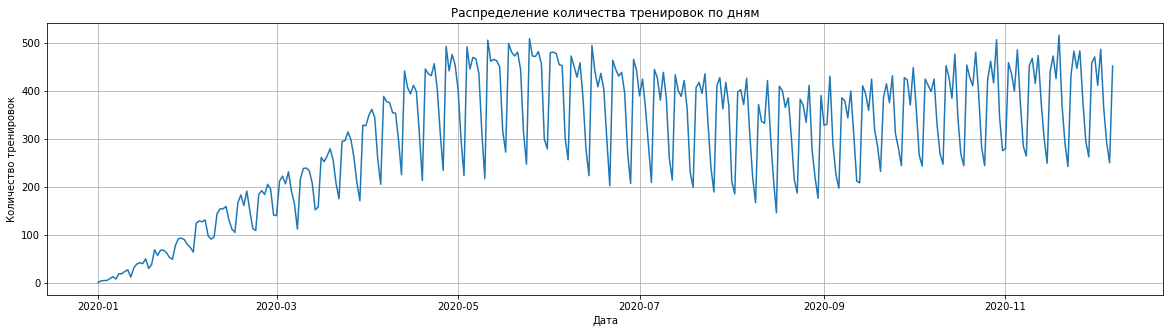

In [43]:
plt.figure(figsize=(20, 5)) 
plt.title('Распределение количества тренировок по дням') 
plt.xlabel('Дата') 
plt.ylabel('Количество тренировок') 

plt.grid() 

plt.plot(trainings_by_day.iloc[:-1])

plt.show()

На графике можно увидеть прирост количества тренировок с января к декабрю. 
В летние месяцы количество занятий в день уменьшается. 
Также на графике видна сесезонность в зависимости от дней недели.

## Задание 2

В ноябре постоянные тренеры жаловались на перегрузку. При этом в одних департаментах часто не хватало тренеров, а в других люди сидели без работы. Поэтому по каждому департаменту нам важно узнать, какую нагрузку имеют тренера (в количестве тренировок) и сколько тренеров имеют ту или иную нагрузку. 

**Построй гистограмму распределения, которая покажет, сколько тренеров провели n число тренировок в ноябре. При подсчете постоянных тренеров рассматриваем только тех, которые уже работали в нашей компании до 1 ноября. Сделай отдельный график по каждому департаменту (всего их 7).**

Как это сделать:

1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделали:
    - отобрали тренеров, которые уже проводили тренировки до начала ноября
    - взяли тренировки, которые прошли в ноябре
    - выбрали из них те, которые провели ранее отобранные тренеры
    

2. В цикле для каждого департамента: 

    - отфильтруй по `trainer_department` тренировки нужного департамента
    - построй гистограмму распределения количества тренеров по количеству проведенных тренировок. Можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - задай цвет на графике
        - задай 5 столбцов
      


In [45]:
# выбрали тренеров, которые вели тренировки до 1 ноября
trainers_select = workouts['trainer_id'].loc[workouts['start_at'] < '2020-11-01'] 

# множеством взяли уникальные значения
trainers_select = set(trainers_select) 

In [46]:
# взяли тренировки только за ноябрь
november_workouts = workouts.loc[workouts['start_at'].dt.month == 11] 

# берем только активных тренеров
november_workouts = november_workouts.loc[november_workouts['trainer_id'].isin(trainers_select)] 

In [47]:
# кол-во тренировок у каждого тренера
workouts_by_trainer = november_workouts.groupby(['trainer_id','trainer_department'])['workout_id'].count() 

# превращаем series в dataframe, сбрасываем индекс
workouts_by_trainer = workouts_by_trainer.reset_index() 

# переименовываем столбец workout_id, ведь в нем теперь количество тренировок
workouts_by_trainer.columns = ['trainer_id','trainer_department','workouts'] 

workouts_by_trainer.head()

,trainer_id,trainer_department,workouts
0,1994,Spartacus,26
1,4446,Spartacus,9
2,9256,Spartacus,9
3,14431,Spartacus,11
4,15062,Spartacus,8


In [72]:
# посмотрим, какие у нас есть департаменты
departments = set(workouts_by_trainer['trainer_department'])
workouts_by_trainer

,trainer_id,trainer_department,workouts
0,1994,Spartacus,26
1,4446,Spartacus,9
2,9256,Spartacus,9
3,14431,Spartacus,11
4,15062,Spartacus,8
...,...,...,...
1612,10787796,Sales,1
1613,10790388,Sales,2
1614,10790715,Sales,2
1615,10803397,Sales,2


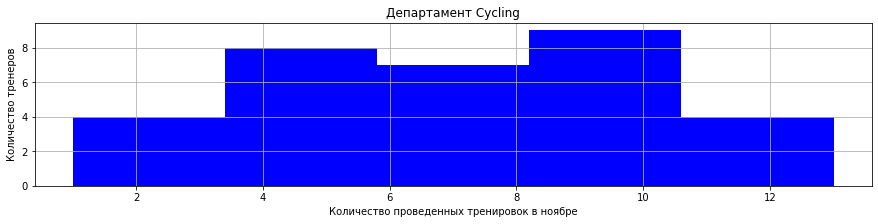

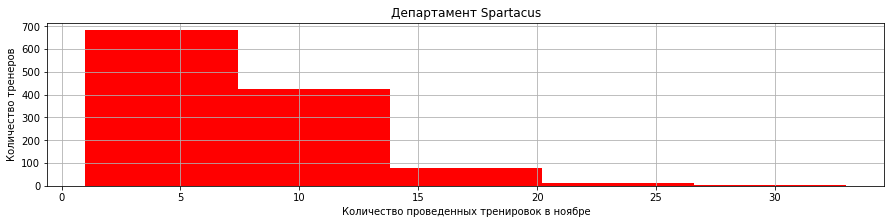

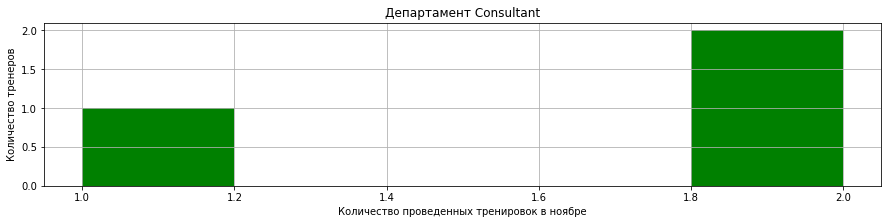

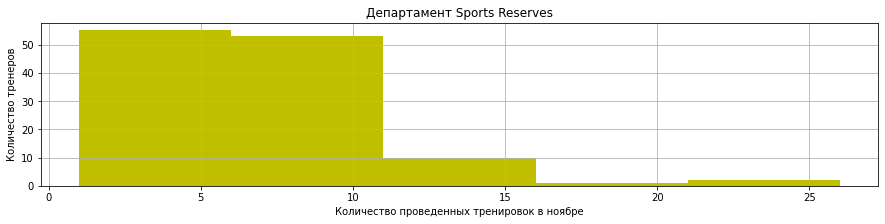

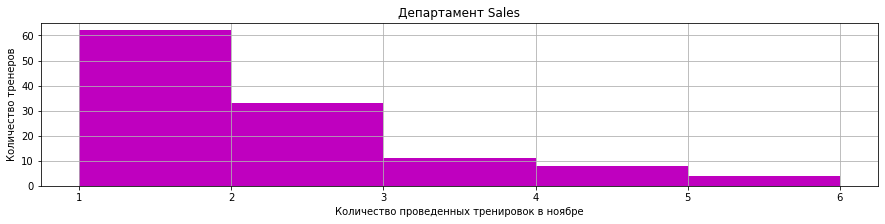

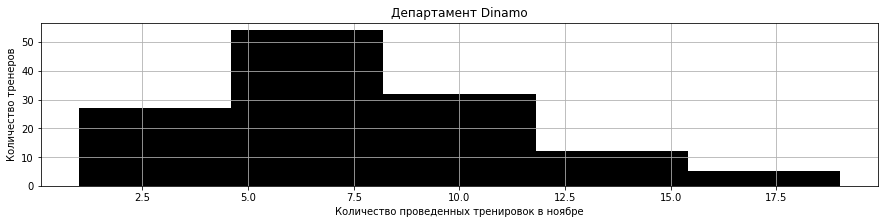

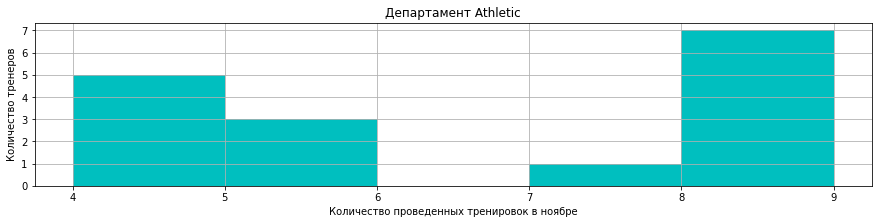

In [120]:
colors_dep = {'Cycling':'b',
                  'Spartacus':'r', 
                  'Consultant':'g', 
                  'Sports Reserves':'y',
                  'Sales':'m',
                  'Dinamo':'k',
                  'Athletic':'c',
                 } 

for unique_department in departments:
    to_plot = workouts_by_trainer.loc[workouts_by_trainer['trainer_department'] == unique_department]
    to_plot = to_plot.sort_values('workouts')

    plt.figure(figsize=(15,3))

    plt.grid()
    plt.title("Департамент " + unique_department)
    plt.xlabel("Количество проведенных тренировок в ноябре")
    plt.ylabel("Количество тренеров")
    
    plt.hist(to_plot['workouts'], color = colors_dep[unique_department], bins=5)

    plt.show()

## Задание 3

Мы поняли, как тренировки распределились в каждом департаменте, но чтобы принимать какие-то решения, нужно посмотреть общую картину. Здесь нам поможет боксплот: увидим, в каких департаментах низкое среднее количество тренировок по сравнению с остальными и где больше перегруженных тренеров.

**Построй boxplot (один) с распределением тренеров по количеству проведенных уроков с разбивкой по департаментам.**

Как это сделать:

1. В функцию, которая строит boxplot, передай аргументы: департаменты, общее количество проведенных тренерами занятий и количество тренировок у каждого тренера
2. Используй цвет
3. Оставь комментарий: какие рекомендации можно дать по распределению нагрузки на тренеров разных департаментов, глядя на этот график?

In [132]:
import seaborn as sns # библиотека seaborn

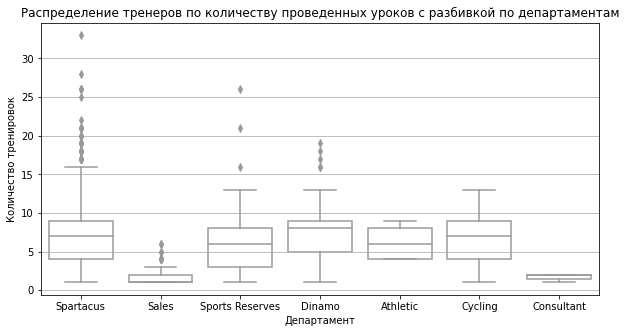

In [133]:
plt.figure(figsize=(10, 5)) 
plt.title('Распределение тренеров по количеству проведенных уроков с разбивкой по департаментам') # Подпишем заголовок графика
plt.grid() 

sns.boxplot(x='trainer_department',
            y='workouts',
            data=workouts_by_trainer, 
            color='w')
plt.ylabel('Количество тренировок') 
plt.xlabel('Департамент') 
plt.show()

Департамент Spartacus, Dinamo и Sales перегруженs, в связи с чем, необходимо задуматься над возможностью увеличения численности персонала данных департаментов. Возможно, существует возможность перераспределения численности из Consultant и Athletic.

## Задание 4


Логично, что дешевые тренировки пропускают чаще дорогих, но мы хотим сформировать стратегию по снижению количеству пропусков, а значит нам нужны более точные данные. Для начала мы хотим посмотреть детально на корреляцию нескольких параметров с вероятностью пропусков. Возможно, это позволит нам лучше сегментировать нашу аудиторию.

Есть гипотеза, что на вероятность прогула влияет не только цена, но и возраст. Изучи этот вопрос с помощью графиков. 

**Тебе предстоит построить 3 скаттерплота в этом задании. Оставь комментарий по каждому графику – видишь ли ты какие-то явные зависимости в данных?**

1. **Внимательно изучи код, который мы подготовили, и запусти ячейки.** Что мы сделали:
    - отфильтровали только платные тренировки
    - поменяли тип данных в числовых столбцах на `int`
    - разметили столбец со статусом, успешные тренировки пометили единицей, пропущенные - нулем, чтобы высчитать долю пропусков
    - создали датафрейм, где подсчитана доля прогулов по двум параметрам: возраст и цена


2. **Построй скаттерплот, который покажет корреляцию прогулов к цене**
    - используй группировку и создай датафрейм, где подсчитан процент прогулов аналогично предподготовленному датафрейму `cost_age_data_agg`, но без возраста, только с ценой
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - задай цвет на графике
    
Подготовим данные:

In [137]:
# отфильтровали бесплатные тренировки и сделали копию датафрейма
cost_age_data = workouts_users[['status','cost','age']].loc[workouts_users.workout_schedule_type!='trial'].dropna().copy()

# Изменяем тип данных столбцов age и cost на int. Это нужно, чтобы на подписях к диаграммам числа были целыми
cost_age_data['age'] = cost_age_data['age'].apply(int) 
cost_age_data['cost'] = cost_age_data['cost'].apply(int)

# Кодируем столбец status, присваивая 1 в случаях, если он равен failed_by_client и 0 в случае success
cost_age_data['status'] = cost_age_data.status.map({'success':0,'failed_by_client':1})

# создаём агрегированные наборы данных
cost_age_data_agg = cost_age_data.groupby(['cost','age'])['status'].mean().reset_index() #считаем долю прогулов по возрасту и цене 

cost_age_data_agg

,cost,age,status
0,500,5,0.000000
1,500,6,0.500000
2,500,7,0.500000
3,500,8,0.242424
4,500,9,0.235294
...,...,...,...
185,1500,47,0.000000
186,1500,49,0.125000
187,1500,50,0.500000
188,1500,55,0.187500


In [138]:
cost_data_agg = cost_age_data.groupby(['cost'])['status'].mean().reset_index() #считаем долю прогулов по возрасту и цене 
cost_data_agg

,cost,status
0,500,0.254996
1,750,0.210409
2,1000,0.158010
3,1500,0.121612


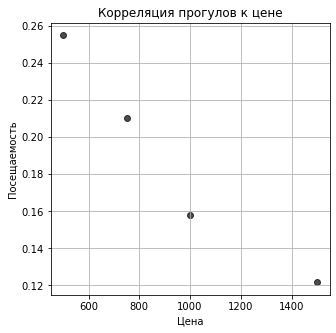

In [143]:
plt.figure(figsize=(5, 5))

plt.title('Корреляция прогулов к цене') 
plt.xlabel('Цена') 
plt.ylabel('Посещаемость') 

plt.grid() 

plt.scatter(
    cost_data_agg.cost, 
    cost_data_agg.status, 
    alpha = 0.7, 
    color = 'k'
)

plt.show() 

На графике видна зависимость посещаемости от цены тренировок - чем выше цена, тем реже прогуливают занятия.

3. **Построй скаттерплот, который покажет корреляцию прогулов к возрасту**
    - используй группировку и создай датафрейм, где подсчитан процент прогулов аналогично предподготовленному датафрейму `cost_age_data_agg`, но без цен, только с возрастом
    - в функцию, которая строит скаттерплот, можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - задай цвет на графике

In [146]:
age_data_agg = cost_age_data.groupby(['age'])['status'].mean().reset_index() #считаем долю прогулов по возрасту и цене 

age_data_agg.head()

,age,status
0,4,0.255814
1,5,0.500000
2,6,0.216216
3,7,0.241379
4,8,0.250000


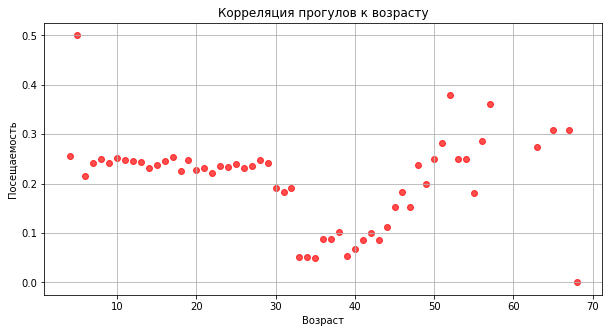

In [154]:
plt.figure(figsize=(10, 5))

plt.title('Корреляция прогулов к возрасту') 
plt.xlabel('Возраст') 
plt.ylabel('Посещаемость') 

plt.grid() 

plt.scatter(
    age_data_agg.age, 
    age_data_agg.status, 
    alpha = 0.7,
    color = 'r'
)

plt.show() 

На графике видна зависимость посещаемости от возраста. В возрасте, примерно, от 6 до 32 - посещаемость средняя и равнораспределена, после 32 посещаемость возрастает, далее, после 45 посещаемость снова снижается.

4. **Построй скаттерплот, который покажет корреляцию прогулов и к возрасту, и к цене одновременно**
    - создай словарь цветов и цен в переменной `price_color`. Чтобы увидеть все уникальные значения, можно использовать множества
    - в функцию, которая строит скаттерплот, можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - аргумент  `с` - цвета для разных цен
          

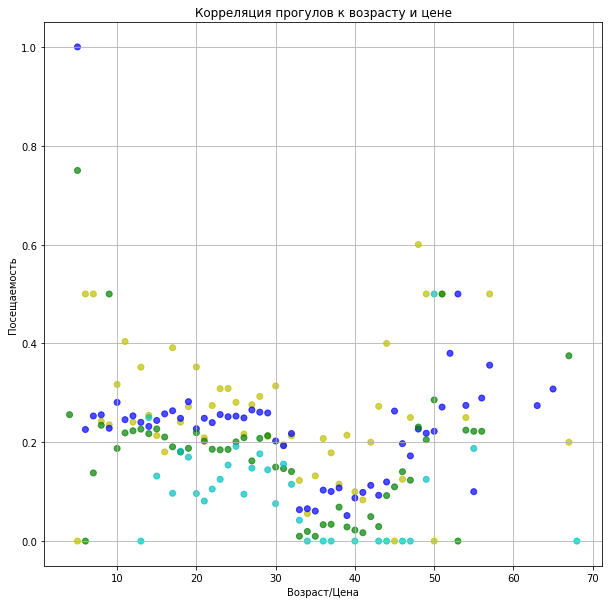

In [152]:
price_color = {500:'y',
               750:'b' ,
               1000:'g' ,
               1500:'c' ,
              }

plt.figure(figsize=(10, 10))

plt.title('Корреляция прогулов к возрасту и цене') 
plt.xlabel('Возраст/Цена') 
plt.ylabel('Посещаемость') 

plt.grid() 

plt.scatter(
    cost_age_data_agg.age,
    cost_age_data_agg.status,
    c = cost_age_data_agg['cost'].map(price_color),
    alpha = 0.7,

)

plt.show()

На графике видна корреляция от возраста и от цены. Важно отметить, что зависимость от возраста выше (в возрасте, примерно, от 6 до 32 - посещаемость средняя и равнораспределена, после 32 посещаемость возрастает, далее, после 45 посещаемость снова снижается), но зависимость от цены также видна - чем выше цена, тем реже прогуливают занятия.

## Задание 5

**Сделай heatmаp для кейса из задания 4.** 

1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделали:
    - написали функцию, которая в зависимости от возраста возвращает возрастную группу
    - создали новый столбец, применив функцию к столбцу возраста
    - сгруппировали данные, чтобы для каждой пары возраст-цена была сгруппирована средняя вероятность прогула
    
    
2. Создай сводную таблицу (матрицу), в которой строками будут интервалы возраста, столбцами — цена занятия, значением — доля прогулов.
3. Построй heatmap. Используй любые аргументы, но обязательно добавь вот эти:
    - размер графика
    - название графика
    - подпись оси `X`
    
    - подпись оси `Y`
    - вывод значений в ячейках
    
4. Оставь комментарий: какие закономерности ты видишь на графике?

In [155]:
# пишем функцию, которая поможет разбить клиентов на возрастные группы

def calculate_age_bins(age):
    if age <= 20:
        return '0-20'
    if age <= 25:
        return '21-25'
    if age <= 30:
        return '26-30'
    if age <= 35:
        return '31-35'
    if age <= 40:
        return '36-40'
    if age <= 45:
        return '41-45'
    if age <= 50:
        return '46-50'
    return '50+'

In [156]:
# кладем в новый столбец возрастную группу
cost_age_data['age_bin'] = cost_age_data.age.apply(calculate_age_bins)

# создаём агрегированный набор данных
cost_age_data_agg = cost_age_data.groupby(['cost','age_bin'])['status'].mean().reset_index()
cost_age_data_agg

,cost,age_bin,status
0,500,0-20,0.286578
1,500,21-25,0.283505
2,500,26-30,0.255597
3,500,31-35,0.165217
4,500,36-40,0.175573
5,500,41-45,0.191489
6,500,46-50,0.285714
7,500,50+,0.307692
8,750,0-20,0.249445
9,750,21-25,0.250124


In [158]:
heat_cost_age_status = cost_age_data_agg.pivot(index="cost", 
                                        columns="age_bin", 
                                        values="status")
heat_cost_age_status

age_bin,0-20,21-25,26-30,31-35,36-40,41-45,46-50,50+
cost,,,,,,,,
500,0.286578,0.283505,0.255597,0.165217,0.175573,0.191489,0.285714,0.307692
750,0.249445,0.250124,0.249445,0.128114,0.097115,0.109646,0.198748,0.296992
1000,0.206955,0.190771,0.191932,0.069580,0.035191,0.067100,0.171171,0.239130
1500,0.133663,0.158784,0.124706,0.100313,0.000000,0.000000,0.097561,0.176471


Построй heatmap. Используй любые аргументы, но обязательно добавь вот эти:

размер графика

название графика

подпись оси X

подпись оси Y

вывод значений в ячейках

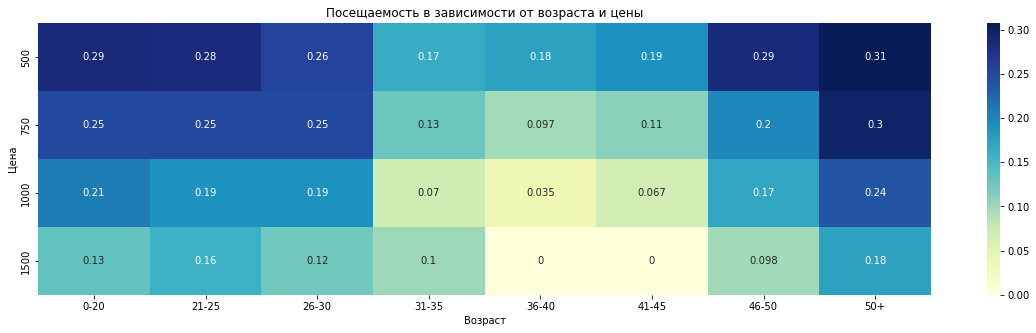

In [161]:
plt.figure(figsize=(20,5))
sns.heatmap(heat_cost_age_status, 
            annot=True, 
            cmap="YlGnBu")
plt.title("Посещаемость в зависимости от возраста и цены")
plt.ylabel("Цена")
plt.xlabel("Возраст")
plt.show()

На графике можно увидеть зависимость посещаемости от цены и возраста. Чем дороже тренировки, тем выше посещаемость, также посещаемость выше у посетителей среднего возраста.

## EXTRA

Если остались силы, сделай дополнительное задание по желанию. Основная его сложность в том, что нужно построить bar chart, а на занятии функцию этого графика мы не проходили. Но найти информацию самостоятельно будет совсем не сложно. 

**Чтобы углубиться в данные, построй bar chart количества тренировок по дням недели (с понедельника по воскресенье) и отобрази горизонтальной линией на графике среднее количество тренировок  в день.**

Как это сделать:
1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделалали:
    - вернули индекс внутри датафрейма
    - переименовали столбцы, чтобы они соответствовали содержимому
    - добавили столбец с номером дня недели с помощью `dt.weekday`
    
    - добавили столбец с названием дня недели с помощью `dt.day_name()`
    

2. Cгруппируй данные колонки `week_day_num` по `workouts` с подсчетом среднего.
3. Построй bar chart. Можешь добавить любые агрументы, но обязательно используй вот эти:

    - размер графика
    - название графика
    - подпись оси `X`
    
    - подпись оси `Y`
    - задай цвет на графике
    

4. Добавь горизонтальную линию, параллельную оси `X`, со значением `y` равным средним количеством тренировок в день. Если не помнишь, как это делать, смело смотри шпаргалку – там ты найдешь все детали.
5. Если еще осталось желание исследовать новое, можешь добавить на график название дней недели, задав их с помощью метода `plt.xticks`, его ты легко найдешь в документации. 
6. Оставь комментарий: что ты видишь на графике? 

**Подготовим данные**

In [ ]:
trainings_by_day # посмотрим, в каком формате лежат нужные данные

In [ ]:
trainings_by_day_frame = trainings_by_day.reset_index() # сбросим индекс
trainings_by_day_frame.columns=['workouts_date', 'workouts'] # переименуем столбцы, чтобы названия соответствовали содержимому
trainings_by_day_frame['week_day_num'] = trainings_by_day_frame['workouts_date'].dt.weekday # добавим номер дня недели
trainings_by_day_frame['week_day_name'] = trainings_by_day_frame['workouts_date'].dt.day_name() # добавим название дня недели
trainings_by_day_frame

Мы видим, что нумерация начинается с 0 до 6. Чтобы дни недели выглядели привычнее, добавим к номеру дня 1.

In [ ]:
trainings_by_day_frame['week_day_num'] += 1 